# Question

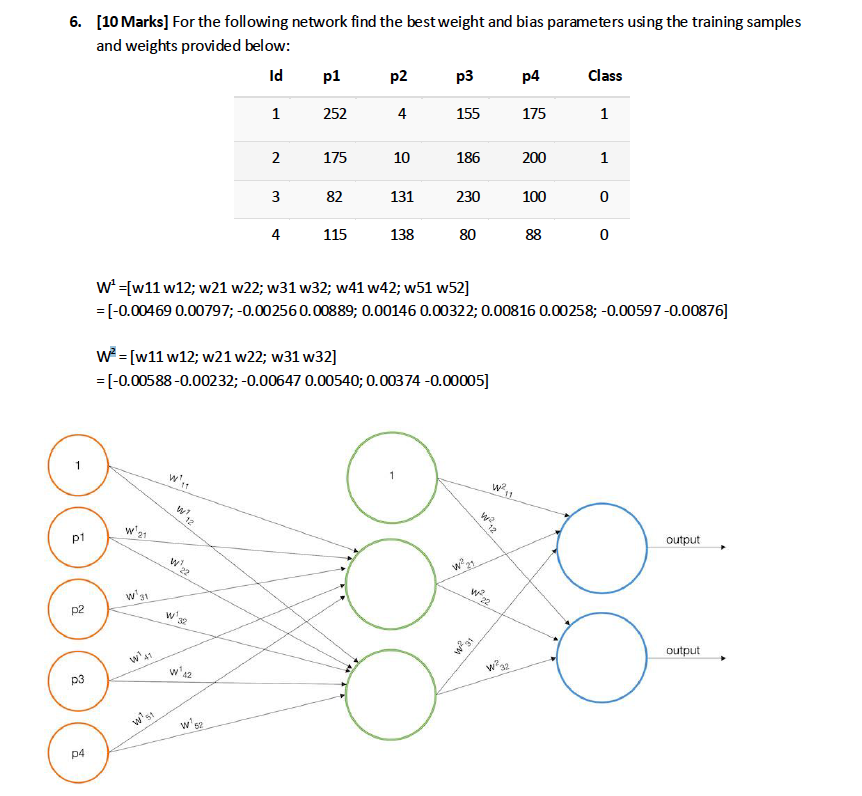

## Imports

In [1]:
import numpy as np

from sklearn.metrics import accuracy_score

## Necessary Functions

In [2]:
def calc_hypothesis(W, X):
    return np.dot(W.T, X)

In [3]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [4]:
def softmax_sigmoid(X):
    exps = np.exp(X - np.max(X))
    return np.divide(exps,np.sum(exps, axis = 0))

In [5]:
def unstable_softmax(z):
    e_z = np.exp(z)
    sums = np.sum(e_z, axis=0)
    return np.divide(e_z, sums)

In [6]:
def convert_label_binary_matrix(y):
    final = np.zeros((y.shape[0], np.unique(y).shape[0]))
    for m in range(len(y)):
        final[m][y[m]]=1
    return final.T

In [7]:
def accuracy(label,y_predicted, y):
    y_multilabel = []
    for p in y_predicted:
        y_multilabel.append(list(p).index(max(p)))
    a = accuracy_score(y_multilabel, y)
    print(label, a)
    return a

In [8]:
def delta_cross_entropy(x,y):
    grad = (x - y)/m
    return grad

In [9]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [10]:
def cross_entropy(p,y):
    return (-y*np.log(p)) / m

## Initialisations

In [11]:
x = np.array([[252, 4, 155, 175],
     [175, 10, 186, 200],
     [82, 131, 230, 100],
     [115, 138, 80, 88]])

In [12]:
m = x.shape[0]

In [13]:
y = np.array([1, 1, 0, 0])

In [14]:
y_binary = convert_label_binary_matrix(y)

In [15]:
y_binary

array([[0., 0., 1., 1.],
       [1., 1., 0., 0.]])

In [16]:
layers = 3

a0 = x.T

_lambda = 0
lr = 0.1
    
layers = layers - 1

In [17]:
Delta0 = np.zeros((2, 4))
Delta1 = np.zeros((2, 2))

In [18]:
b0 = np.array([[-0.00469, 0.00797]])

b1 = np.array([[-0.00588, -0.00232]])

In [19]:
w0 = np.array([[-0.00256, 0.00889],
                 [0.00146, 0.00322],
                 [0.00816, 0.00258],
                 [-0.00597, -0.00876]])

w1 = np.array([[-0.00647, 0.00540],
                 [0.00374, -0.00005]])

## Neural Network

In [20]:
for i in range(10):
    z1 = calc_hypothesis(w0, a0) + b0.T
    a1 = sigmoid(z1)

    z2 = calc_hypothesis(w1, a1) + b1.T
    a2 = unstable_softmax(z2)

    y_predicted = a2

    delta2 = delta_cross_entropy(y_predicted, y_binary)

    delta1 = np.dot(w1, delta2) * sigmoid_derivative(a1)

    Delta0 = Delta0 + np.dot(delta1, a0.T)
    Delta1 = Delta1 + np.dot(delta2, a1.T)

    D0 = (1/m) * (Delta0.T + (_lambda * w0))
    D1 = (1/m) * (Delta1.T + (_lambda * w1))

    w0 = w0 - (lr*D0)
    w1 = w1 - (lr*D1)

    b0 = (b0 - (lr * (1/m) * delta1.sum(1)))
    b1 = (b1 - (lr * (1/m) * delta2.sum(1)))
    
    accuracy("\nTrain Accuracy:", y_predicted.T, y)


Train Accuracy: 0.5

Train Accuracy: 0.5

Train Accuracy: 0.5

Train Accuracy: 0.5

Train Accuracy: 1.0

Train Accuracy: 1.0

Train Accuracy: 1.0

Train Accuracy: 1.0

Train Accuracy: 1.0

Train Accuracy: 1.0


## Final Weights and Biases

### Weights - w0

In [21]:
w0

array([[ 0.0169813 , -0.03193234],
       [-0.07261451,  0.090132  ],
       [-0.0067714 ,  0.01620173],
       [ 0.01065834, -0.04138057]])

### Weights - w1

In [22]:
w1

array([[-0.05378142,  0.05271142],
       [ 0.13688741, -0.13319741]])

### Bias - b0

In [23]:
b0

array([[-0.00471631,  0.00799885]])

### Bias - b1

In [24]:
b1

array([[-0.00672079, -0.00147921]])